# Importation des librairies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation des données


df = pd.read_csv("./data_openfoodfact_products.csv", sep=",")

df.head()

,Unnamed: 0,code,product_name,countries,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,sugars_100g,nutrition-score-fr_100g
0,106,36252,Lion Peanut x2,en:FR,e,Sugary snacks,Sweets,1883.0,57.5,22.0
1,190,10187319,Mini Confettis,en:FR,d,Sugary snacks,Sweets,1753.0,87.7,14.0
2,191,10207260,Praliné Amande Et Noisette,en:FR,d,Sugary snacks,Sweets,2406.0,50.3,14.0
3,218,20424640,Belgische Pralinen,Germany,e,Sugary snacks,Sweets,2257.0,51.5,26.0
4,226,40608754,"Pepsi, Nouveau goût !",en:FR,e,Beverages,Sweetened beverages,177.0,10.4,13.0


## Analyse uni-variée

In [3]:
# Statistiques descriptives pour les colonnes pertinentes
print("Statistiques descriptives pour les colonnes pertinentes :")
print(df[['sugars_100g', 'nutrition-score-fr_100g']].describe())

Statistiques descriptives pour les colonnes pertinentes :
        sugars_100g  nutrition-score-fr_100g
count  14048.000000             14048.000000
mean      31.067685                14.225868
std       21.049266                 7.868357
min        0.000000                 0.000000
25%       12.000000                 8.000000
50%       28.000000                14.000000
75%       46.000000                21.000000
max      100.000000                35.000000


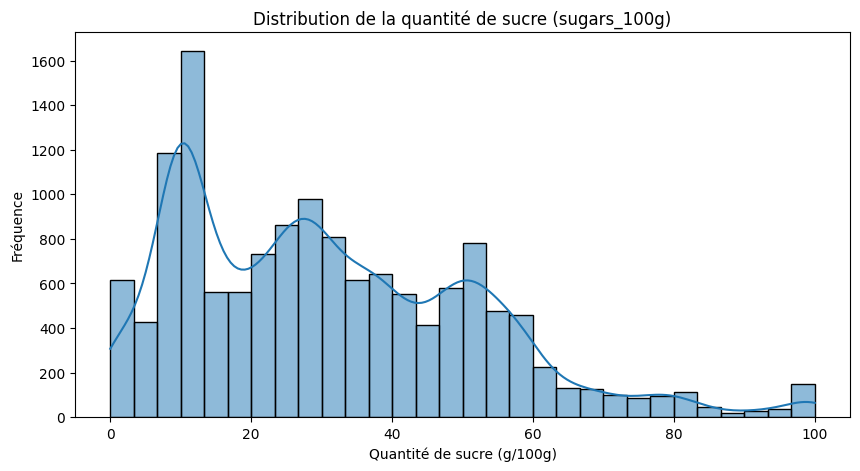

In [4]:
# Distribution de la quantité de sucre
plt.figure(figsize=(10, 5))
sns.histplot(df['sugars_100g'], kde=True, bins=30)
plt.title("Distribution de la quantité de sucre (sugars_100g)")
plt.xlabel("Quantité de sucre (g/100g)")
plt.ylabel("Fréquence")
plt.show()

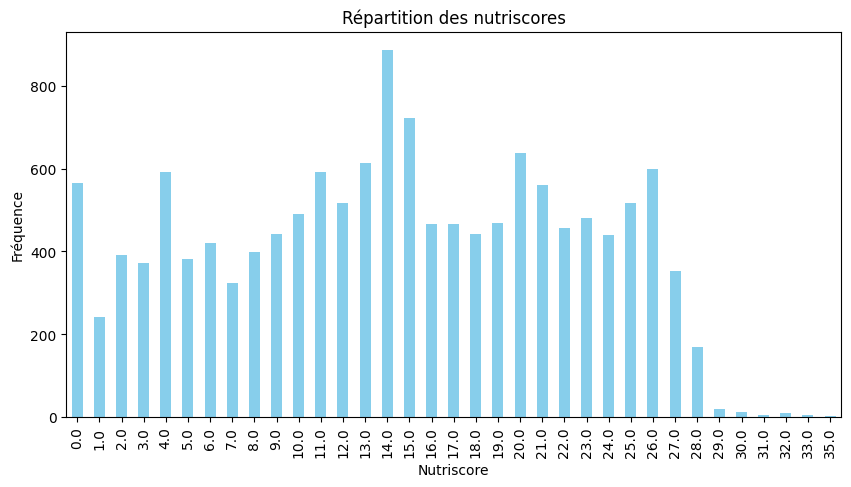

In [5]:
# Répartition des nutriscores
plt.figure(figsize=(10, 5))
df['nutrition-score-fr_100g'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Répartition des nutriscores")
plt.xlabel("Nutriscore")
plt.ylabel("Fréquence")
plt.show()

## Analyse bi-variée

In [6]:
print(df['nutrition-score-fr_100g'].unique())

[22. 14. 26. 13. 12.  6. 18. 20. 19. 24. 21. 16.  0. 15.  2. 17.  3. 10.
 23. 29. 25.  1.  9.  5.  4. 11. 27. 28.  7.  8. 30. 33. 31. 32. 35.]


In [7]:
existing_categories = df['nutrition-score-fr_100g'].dropna().unique()
print("Catégories existantes :", existing_categories)

Catégories existantes : [22. 14. 26. 13. 12.  6. 18. 20. 19. 24. 21. 16.  0. 15.  2. 17.  3. 10.
 23. 29. 25.  1.  9.  5.  4. 11. 27. 28.  7.  8. 30. 33. 31. 32. 35.]


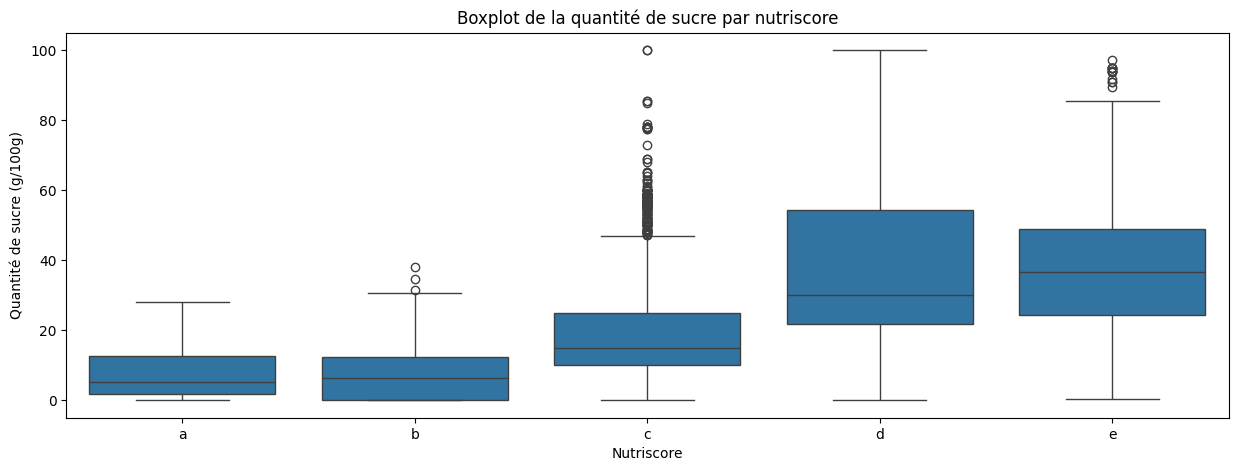

In [8]:
existing_categories = sorted(df['nutrition_grade_fr'].unique())


plt.figure(figsize=(15, 5))
sns.boxplot(x='nutrition_grade_fr', y='sugars_100g', data=df, order=existing_categories)
plt.title("Boxplot de la quantité de sucre par nutriscore")
plt.xlabel("Nutriscore")
plt.ylabel("Quantité de sucre (g/100g)")
plt.show()

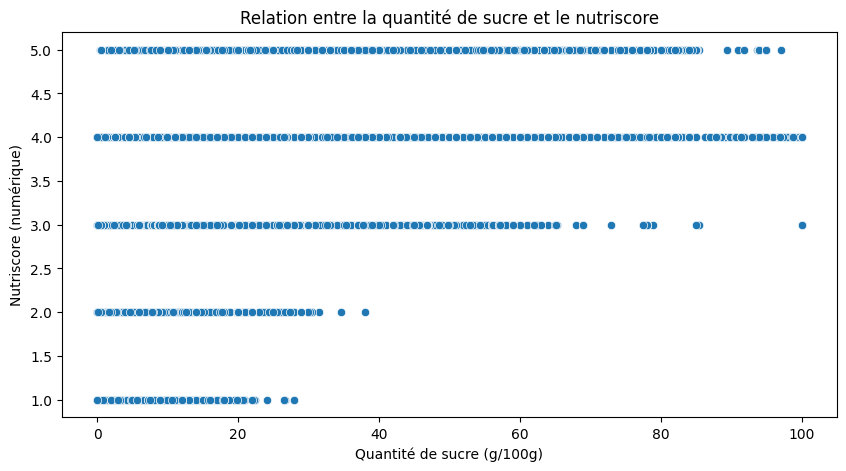

In [9]:
# Scatterplot : Relation entre sucre et nutriscore (numérisé)
# Conversion des nutriscores en valeurs numériques pour une heatmap ou scatterplot
nutriscore_mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
df['nutriscore_numeric'] = df['nutrition_grade_fr'].map(nutriscore_mapping)

plt.figure(figsize=(10, 5))
sns.scatterplot(x='sugars_100g', y='nutriscore_numeric', data=df)
plt.title("Relation entre la quantité de sucre et le nutriscore")
plt.xlabel("Quantité de sucre (g/100g)")
plt.ylabel("Nutriscore (numérique)")
plt.show()

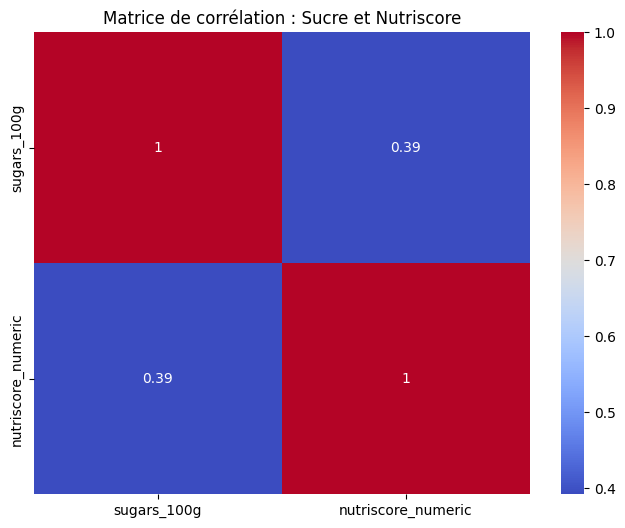

In [10]:
# Heatmap de corrélation pour les colonnes pertinentes
plt.figure(figsize=(8, 6))
correlation_matrix = df[['sugars_100g', 'nutriscore_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation : Sucre et Nutriscore")
plt.show()

In [11]:
# Extraire le premier pays si plusieurs sont listés
df['main_country'] = df['countries'].str.split(',').str[0].str.strip()

# Vérifier les pays les plus fréquents
print(df['main_country'].value_counts().head(10))

main_country
en:FR       12275
Germany      1046
Spain         506
Belgium       138
Portugal       65
Romania        11
Italy           5
Hungary         1
Austria         1
Name: count, dtype: int64


C:\Users\harro\AppData\Local\Temp\ipykernel_33056\2392169292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='main_country', y='sugars_100g', data=df_top_countries, palette='Set2')


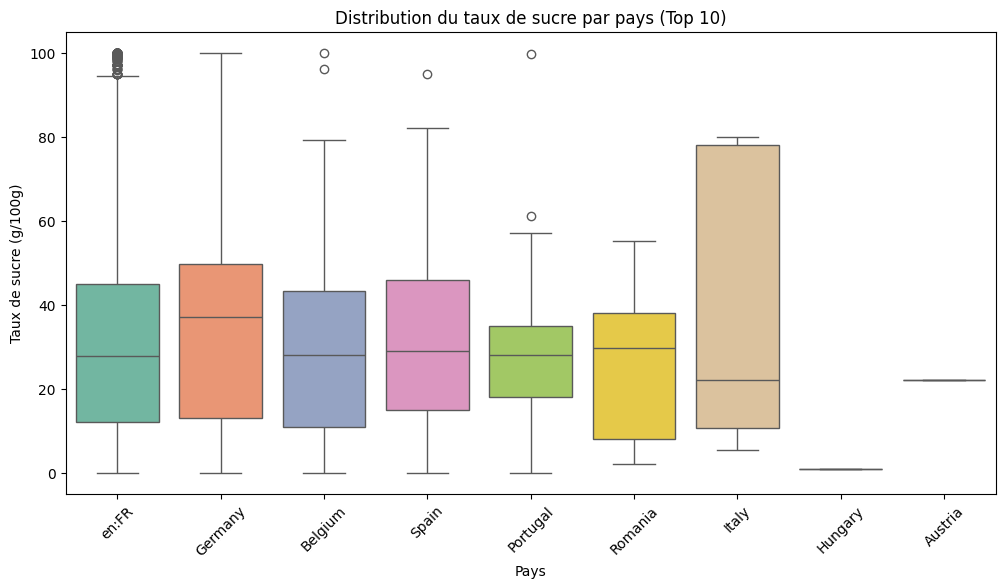

In [13]:
# Filtrer les pays les plus fréquents (Top 10)
top_countries = df['main_country'].value_counts().head(10).index
df_top_countries = df[df['main_country'].isin(top_countries)]

# Tracer le boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_country', y='sugars_100g', data=df_top_countries, palette='Set2')
plt.title("Distribution du taux de sucre par pays (Top 10)")
plt.xlabel("Pays")
plt.ylabel("Taux de sucre (g/100g)")
plt.xticks(rotation=45)
plt.show()

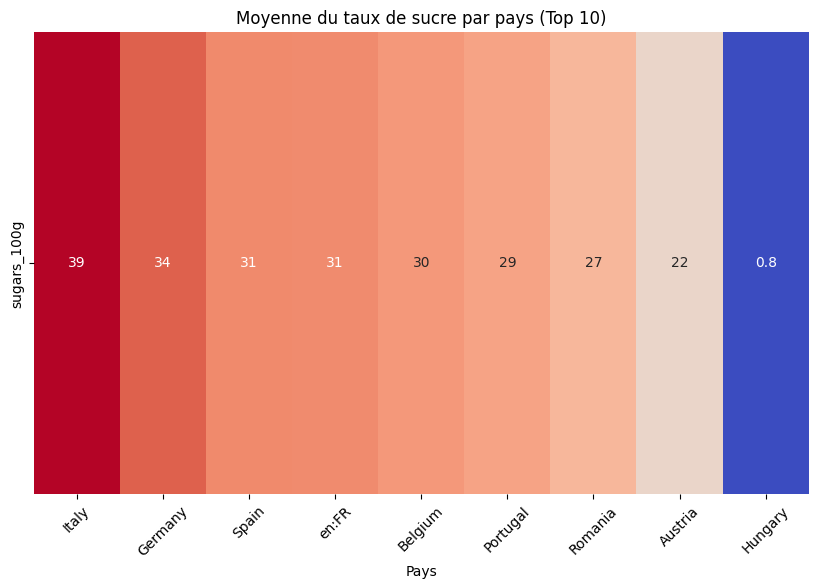

In [14]:
# Calculer la moyenne du sucre par pays
mean_sugars_by_country = df.groupby('main_country')['sugars_100g'].mean().sort_values(ascending=False).head(10)

# Tracer la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_sugars_by_country.to_frame().T, annot=True, cmap='coolwarm', cbar=False)
plt.title("Moyenne du taux de sucre par pays (Top 10)")
plt.xlabel("Pays")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

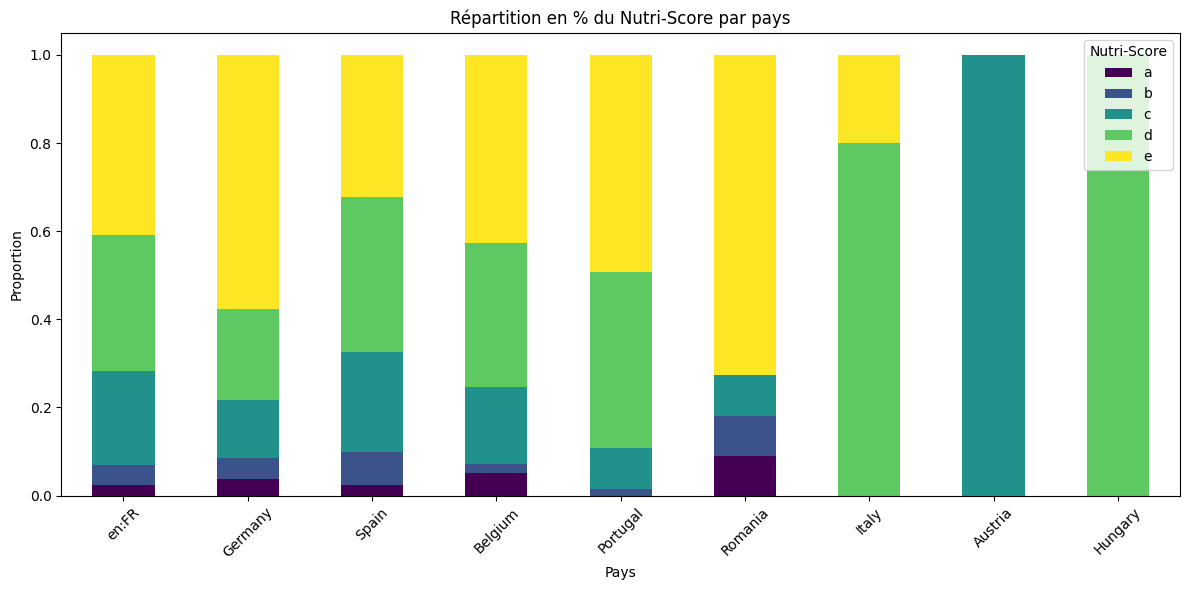

In [15]:
# Création d’un tableau croisé (pivot) pour faire un graphe empilé
cross_tab = pd.crosstab(df['countries'], df['nutrition_grade_fr'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Affichage en graphe
cross_tab_percent.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index[:10]].plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='viridis'
)
plt.title("Répartition en % du Nutri-Score par pays")
plt.xlabel("Pays")
plt.ylabel("Proportion")
plt.legend(title='Nutri-Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
